# Getting Started with AutoARIMA and ETS

Automatic forecasting tools tackle the needs for predictions over large collections of univariate time series that often arise in business practice and other contexts. Among these solutions, R's forecasting package `auto.arima` and `ets` has been a reference for their accuracy and high quality for many years.

Unfortunately, baselines with their accuracy and computational efficiency were not available for Python yet. For this reason, we developed our new and highly efficient pure-Python implementation of these classic algorithms that we showcase in this notebook.


## Installing StatsForecast Library

In [1]:
%%capture
!pip install -U numba
!pip install -U statsmodels
!pip install statsforecast

In [2]:
import numpy as np
import pandas as pd
from IPython.display import display, Markdown
from tqdm.autonotebook import tqdm
import matplotlib.pyplot as plt
from statsforecast import StatsForecast
from statsforecast.models import AutoARIMA, ETS

/tmp/ipykernel_23101/2350185975.py:4: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


## Loading six group merchants Data

In [3]:
data_path = "../../../data/raw/Time_Series_Merchants_Transactions_Anonymized.csv"
df_merchant_transactions = pd.read_csv(data_path)

In [4]:
df_merchant_transactions = df_merchant_transactions.drop(columns='Merchant Name')

In [5]:
# replacing columns names with standard date format
stddates = pd.date_range(start='2020-08', end='2022-10', freq="M")
df_merchant_transactions.columns = stddates
df_merchant_transactions.head()
#stddates

,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28,2021-03-31,2021-04-30,2021-05-31,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,416772,395324,411329,475679,497747,445429,505033,477349,496073,576800,...,644293,700144,611675,639038,616915,686572,630707,622073,667523,668189
1,21,24,13,21,4,80,1,24,183,31,...,11,119,62,52,432,86,108,72,101,80
2,1,1,0,0,50,3,4,4,0,16,...,50,0,0,0,0,0,49,1,1,0
3,159,168,155,152,160,149,147,152,170,150,...,175,159,180,162,183,172,198,183,226,185
4,70,27,60,63,80,57,75,73,85,96,...,132,147,129,127,131,159,150,160,154,168


In [6]:
df_merchant_transactions.iloc[7,:].values

array([ 8965,  1616, 15020, 14939,  1859, 17954,  6520,  7059, 17098,
       16698,  1849, 13873, 13782,  1785, 14982, 10714, 11280, 23258,
        3743,  5259, 21747, 16033,  2111, 10065, 21665,  3328])

In [7]:
stddates

DatetimeIndex(['2020-08-31', '2020-09-30', '2020-10-31', '2020-11-30',
               '2020-12-31', '2021-01-31', '2021-02-28', '2021-03-31',
               '2021-04-30', '2021-05-31', '2021-06-30', '2021-07-31',
               '2021-08-31', '2021-09-30', '2021-10-31', '2021-11-30',
               '2021-12-31', '2022-01-31', '2022-02-28', '2022-03-31',
               '2022-04-30', '2022-05-31', '2022-06-30', '2022-07-31',
               '2022-08-31', '2022-09-30'],
              dtype='datetime64[ns]', freq='M')

In [8]:
df= {
    'unique_id':[1.0,1.0,1.0,1.0,1.0,
                1.0,1.0,1.0,1.0,1.0,
                1.0,1.0,1.0,1.0,1.0,
                1.0,1.0,1.0,1.0,1.0,
                1.0,1.0,1.0,1.0,1.0,1.0],
    'ds':stddates,
    'y' :df_merchant_transactions.iloc[7,:].values
      }
Y_df = pd.DataFrame(df)
Y_df.head()

,unique_id,ds,y
0,1.0,2020-08-31,8965
1,1.0,2020-09-30,1616
2,1.0,2020-10-31,15020
3,1.0,2020-11-30,14939
4,1.0,2020-12-31,1859


## Fit AutoArima and AutoETS

**ETS:** The exponential smoothing (ETS) algorithm is especially suited for data with seasonality and trend. ETS computes a weighted average over all observations in the input time series dataset as its prediction. In contrast to moving average methods with constant weights, ETS weights exponentially decrease over time, capturing long term dependencies while prioritizing new observations.

**AutoARIMA:** The autoregressive integrated moving average (ARIMA), combines differencing steps, lag regression and moving averages into a single method capable of modeling non-stationary time series. This method complements on ETS and it is based on the description of data's autocorrelations.

In [9]:
Y_train_df = Y_df[Y_df["ds"]<="2022-03-30"] # 18 train
Y_test_df = Y_df[Y_df["ds"]>"2022-03-30"] # 8 test

In [10]:
Y_train_df

,unique_id,ds,y
0,1.0,2020-08-31,8965
1,1.0,2020-09-30,1616
2,1.0,2020-10-31,15020
3,1.0,2020-11-30,14939
4,1.0,2020-12-31,1859
5,1.0,2021-01-31,17954
6,1.0,2021-02-28,6520
7,1.0,2021-03-31,7059
8,1.0,2021-04-30,17098
9,1.0,2021-05-31,16698


Define the parameters that you want to use in your models. For `ETS` we pass a `ZMZ`, model, which stands for error and trend kinds selected optimally. In this step, you could include further models like: `SeasonalExponentialSmoothing`, `ADIDA`, `HistoricAverage`, `CrostonClassic`, `CrostonSBA`, `CrostonOptimized`, `SeasonalWindowAverage`, `SeasonalNaive`, `IMAPA`, `Naive`, `RandomWalkWithDrift`, `WindowAverage`, `SeasonalExponentialSmoothing`, and `TSB`.

In [11]:
season_length = 12
horizon = len(Y_test_df)
models = [
    AutoARIMA(season_length=season_length),
    ETS(season_length=season_length, model='ZMZ')
]
model = StatsForecast(
    df=Y_train_df, 
    models=models,
    freq='M', 
    n_jobs=-1,
)

Y_hat_df = model.forecast(horizon).reset_index()
Y_hat_df.head()

/home/mukund/Software/anaconda3/lib/python3.9/site-packages/numba/core/ir_utils.py:2147: NumbaPendingDeprecationWarning: 
Encountered the use of a type that is scheduled for deprecation: type 'reflected list' found for argument 'K' of function 'fourier'.

For more information visit https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-reflection-for-list-and-set-types

File "../../../../../../../Software/anaconda3/lib/python3.9/site-packages/statsforecast/ets.py", line 360:
@njit(nogil=NOGIL, cache=CACHE)
def fourier(x, period, K, h=None):
^

  warnings.warn(NumbaPendingDeprecationWarning(msg, loc=loc))
/home/mukund/Software/anaconda3/lib/python3.9/site-packages/numba/core/ir_utils.py:2147: NumbaPendingDeprecationWarning: 
Encountered the use of a type that is scheduled for deprecation: type 'reflected list' found for argument 'period' of function 'fourier'.

For more information visit https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecat

,unique_id,ds,AutoARIMA,ETS
0,1.0,2022-03-31,13514.290039,12391.093750
1,1.0,2022-04-30,18806.439453,12580.013672
2,1.0,2022-05-31,4905.921875,12771.812500
3,1.0,2022-06-30,14367.242188,12966.536133
4,1.0,2022-07-31,15437.841797,13164.229492


## Plot and Evaluate Predictions

We are going to plot the models againts the real values of test.

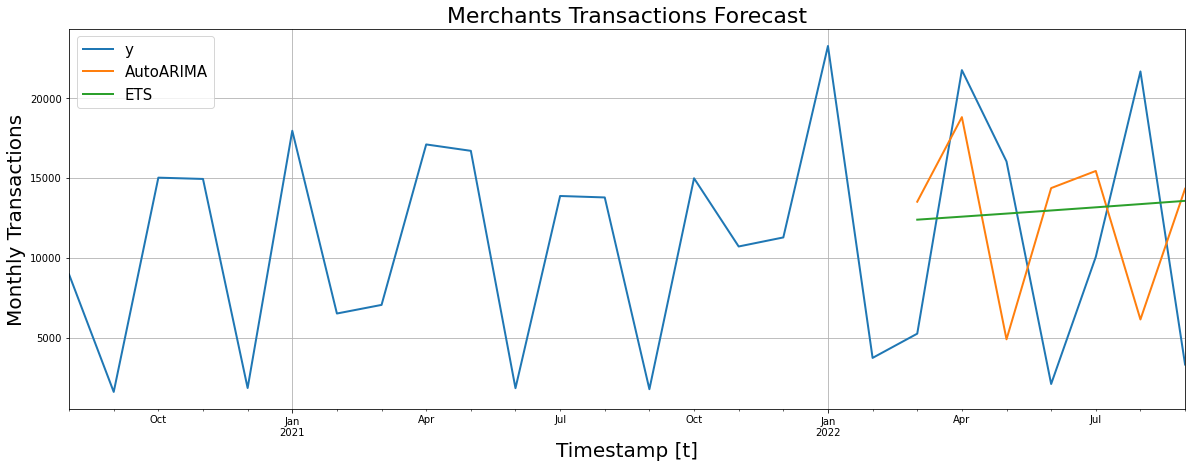

In [12]:
fig, ax = plt.subplots(1, 1, figsize = (20, 7))
Y_hat_df = Y_test_df.merge(Y_hat_df, how='left', on=['unique_id', 'ds'])
plot_df = pd.concat([Y_train_df, Y_hat_df]).set_index('ds')

plot_df[['y', 'AutoARIMA', 'ETS']].plot(ax=ax, linewidth=2)

ax.set_title('Merchants Transactions Forecast', fontsize=22)
ax.set_ylabel('Monthly Transactions', fontsize=20)
ax.set_xlabel('Timestamp [t]', fontsize=20)
ax.legend(prop={'size': 15})
ax.grid()

Finally, we evaluate the predictions accuracy using the Mean Absolute Error:

$$
\qquad MAE = \frac{1}{Horizon} \sum_{\tau} |y_{\tau} - \hat{y}_{\tau}|\qquad
$$

In [13]:
def mae(y_hat, y_true):
    return np.mean(np.abs(y_hat-y_true))

y_true = Y_test_df['y'].values
ets_preds = Y_hat_df['ETS'].values
arima_preds = Y_hat_df['AutoARIMA'].values

print('ETS   MAE: %0.3f' % mae(ets_preds, y_true))
print('ARIMA MAE: %0.3f' % mae(arima_preds, y_true))

ETS   MAE: 7436.543
ARIMA MAE: 9495.364


## Add Confidence Intervals to ARIMA

You just need to add the `level` argument to the `StatsForecast.forecast` method as follows,

In [14]:
Y_hat_df_intervals = model.forecast(h=12, level=(80, 95))

/home/mukund/Software/anaconda3/lib/python3.9/site-packages/statsforecast/ets.py:401: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coefs, *_ = np.linalg.lstsq(X_fourier, y)


Then we plot the intervals,

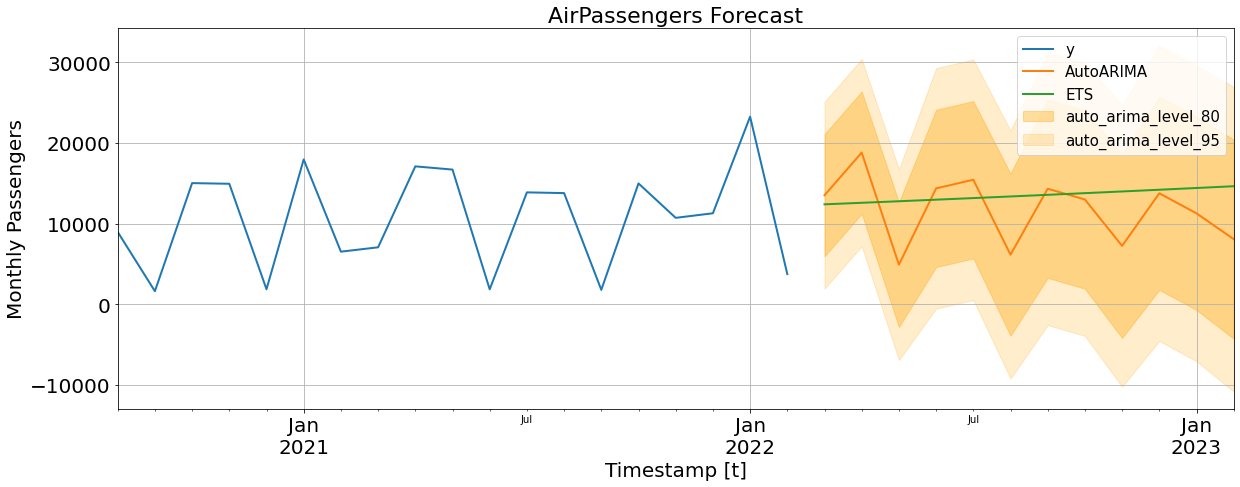

In [15]:
fig, ax = plt.subplots(1, 1, figsize = (20, 7))
df_plot = pd.concat([Y_train_df, Y_hat_df_intervals]).set_index('ds')
df_plot[['y', 'AutoARIMA','ETS']].plot(ax=ax, linewidth=2)
ax.fill_between(df_plot.index, 
                df_plot['AutoARIMA-lo-80'], 
                df_plot['AutoARIMA-hi-80'],
                alpha=.35,
                color='orange',
                label='auto_arima_level_80')
ax.fill_between(df_plot.index, 
                df_plot['AutoARIMA-lo-95'], 
                df_plot['AutoARIMA-hi-95'],
                alpha=.2,
                color='orange',
                label='auto_arima_level_95')
ax.set_title('AirPassengers Forecast', fontsize=22)
ax.set_ylabel('Monthly Passengers', fontsize=20)
ax.set_xlabel('Timestamp [t]', fontsize=20)
ax.legend(prop={'size': 15})
ax.grid()
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(20)

## Add external regressors to ARIMA

First we are going to include new exogenous variables as columns to our train data frame. (You can include things like weather or holidays.)

In [16]:
%%capture
Y_train_df['trend'] = np.arange(1, len(Y_train_df) + 1)
Y_train_df['intercept'] = np.ones(len(Y_train_df))
Y_train_df['month'] = Y_train_df['ds'].dt.month
Y_train_df = pd.get_dummies(Y_train_df, columns=['month'], drop_first=True)

In [17]:
Y_train_df.head(26)

,unique_id,ds,y,trend,intercept,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,1.0,2020-08-31,8965,1,1.0,0,0,0,0,0,0,1,0,0,0,0
1,1.0,2020-09-30,1616,2,1.0,0,0,0,0,0,0,0,1,0,0,0
2,1.0,2020-10-31,15020,3,1.0,0,0,0,0,0,0,0,0,1,0,0
3,1.0,2020-11-30,14939,4,1.0,0,0,0,0,0,0,0,0,0,1,0
4,1.0,2020-12-31,1859,5,1.0,0,0,0,0,0,0,0,0,0,0,1
5,1.0,2021-01-31,17954,6,1.0,0,0,0,0,0,0,0,0,0,0,0
6,1.0,2021-02-28,6520,7,1.0,1,0,0,0,0,0,0,0,0,0,0
7,1.0,2021-03-31,7059,8,1.0,0,1,0,0,0,0,0,0,0,0,0
8,1.0,2021-04-30,17098,9,1.0,0,0,1,0,0,0,0,0,0,0,0
9,1.0,2021-05-31,16698,10,1.0,0,0,0,1,0,0,0,0,0,0,0


We consruct the test dataframe of exogenous variables.

In [18]:
# 
xreg_test = pd.DataFrame({
  'unique_id': 1,
  'ds': pd.date_range(start='2021-10-01', periods=len(Y_hat_df), freq='M')
})
# We construct xreg for test. The train series ends at the 21th step. 
xreg_test['trend'] = np.arange(15, len(Y_hat_df) + 15)
xreg_test['intercept'] = np.ones(len(Y_hat_df))
xreg_test['month'] = xreg_test['ds'].dt.month
xreg_test = pd.get_dummies(xreg_test, columns=['month'], drop_first=True)
xreg_test.head(13)

,unique_id,ds,trend,intercept,month_2,month_3,month_4,month_10,month_11,month_12
0,1,2021-10-31,15,1.0,0,0,0,1,0,0
1,1,2021-11-30,16,1.0,0,0,0,0,1,0
2,1,2021-12-31,17,1.0,0,0,0,0,0,1
3,1,2022-01-31,18,1.0,0,0,0,0,0,0
4,1,2022-02-28,19,1.0,1,0,0,0,0,0
5,1,2022-03-31,20,1.0,0,1,0,0,0,0
6,1,2022-04-30,21,1.0,0,0,1,0,0,0
